In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv('netflix_titles.csv')

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [7]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [9]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [11]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  year_added    8790 non-null   int32         
 13  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 961.4+ KB


In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

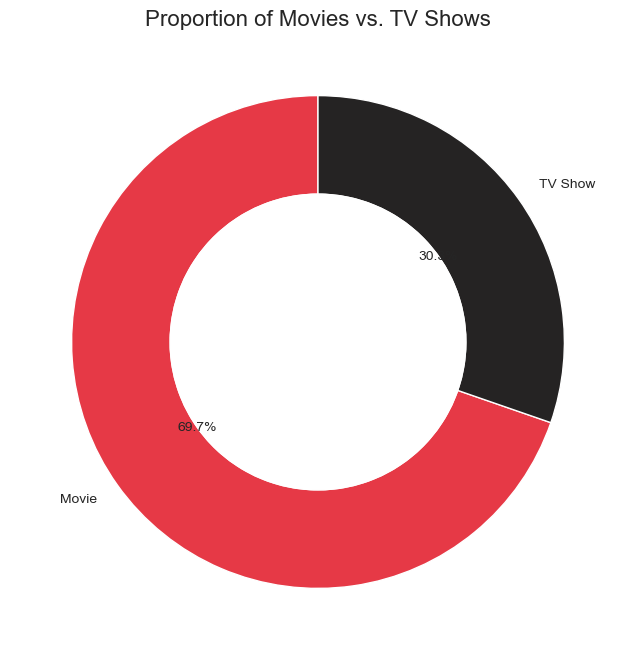

In [22]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts.values, 
        labels=type_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['#e63946', '#252323'],
        wedgeprops=dict(width=0.4)) # This creates the "donut" hole

# Add a circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proportion of Movies vs. TV Shows', fontsize=16)
plt.ylabel('') # Hides the default 'type' label on the side
plt.show()

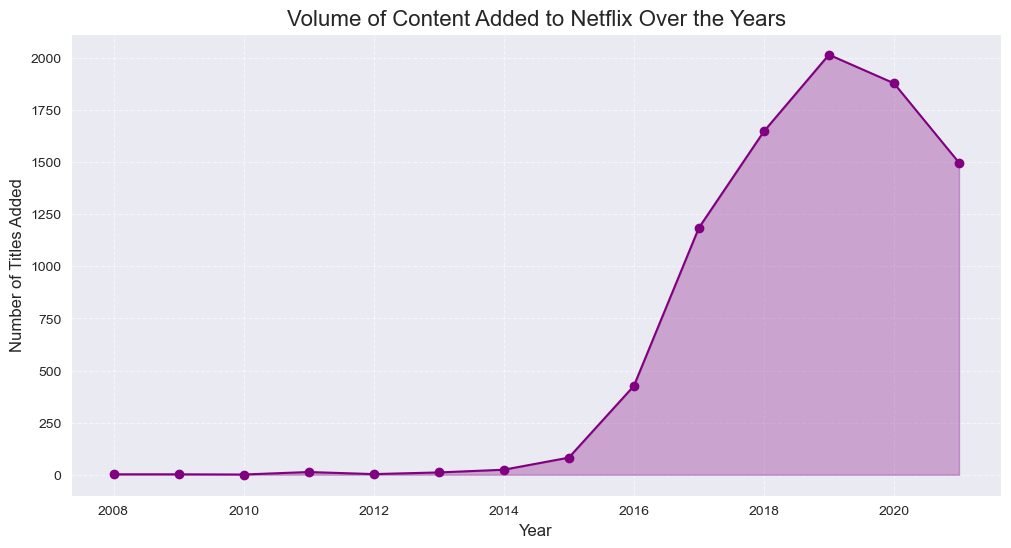

In [23]:
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
# Create the line plot
plt.plot(content_by_year.index, content_by_year.values, marker='o', color='purple')
# Fill the area under the line
plt.fill_between(content_by_year.index, content_by_year.values, color='purple', alpha=0.3)

plt.title('Volume of Content Added to Netflix Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

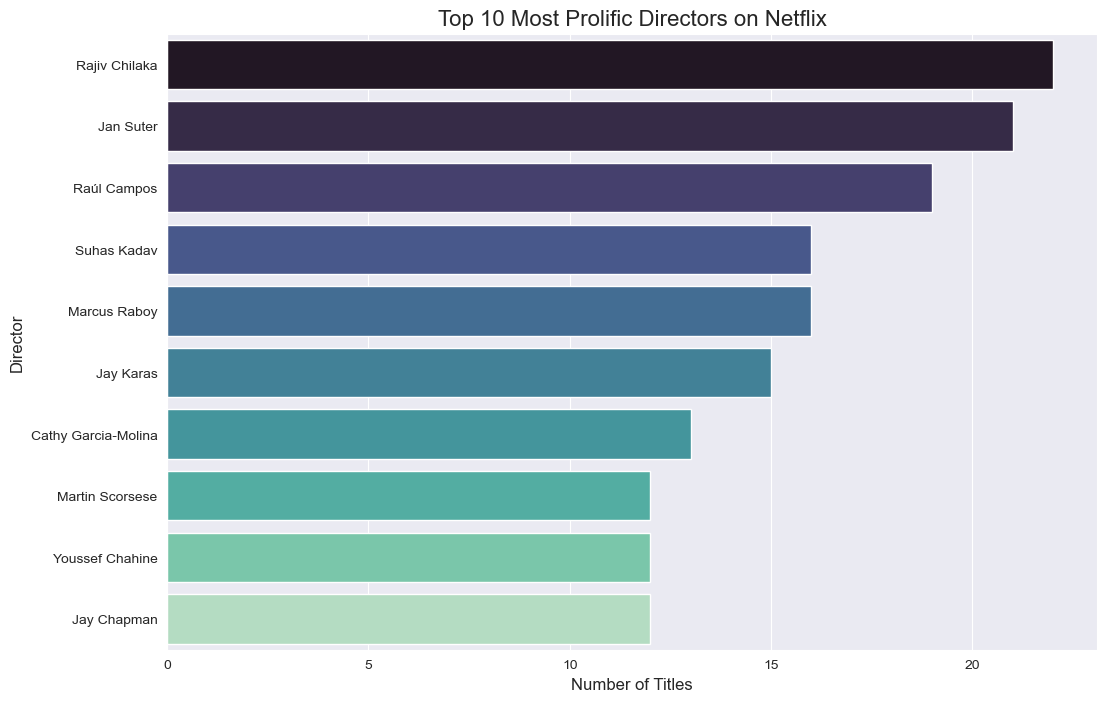

In [16]:
top_directors = df[df['director'] != 'Unknown'].copy()

# Split the directors string and create a new row for each director
top_directors['director'] = top_directors['director'].str.split(', ')
top_directors = top_directors.explode('director')

# Get the top 10 directors
top_10_directors = top_directors['director'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='mako', hue=top_10_directors.index, legend=False)
plt.title('Top 10 Most Prolific Directors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

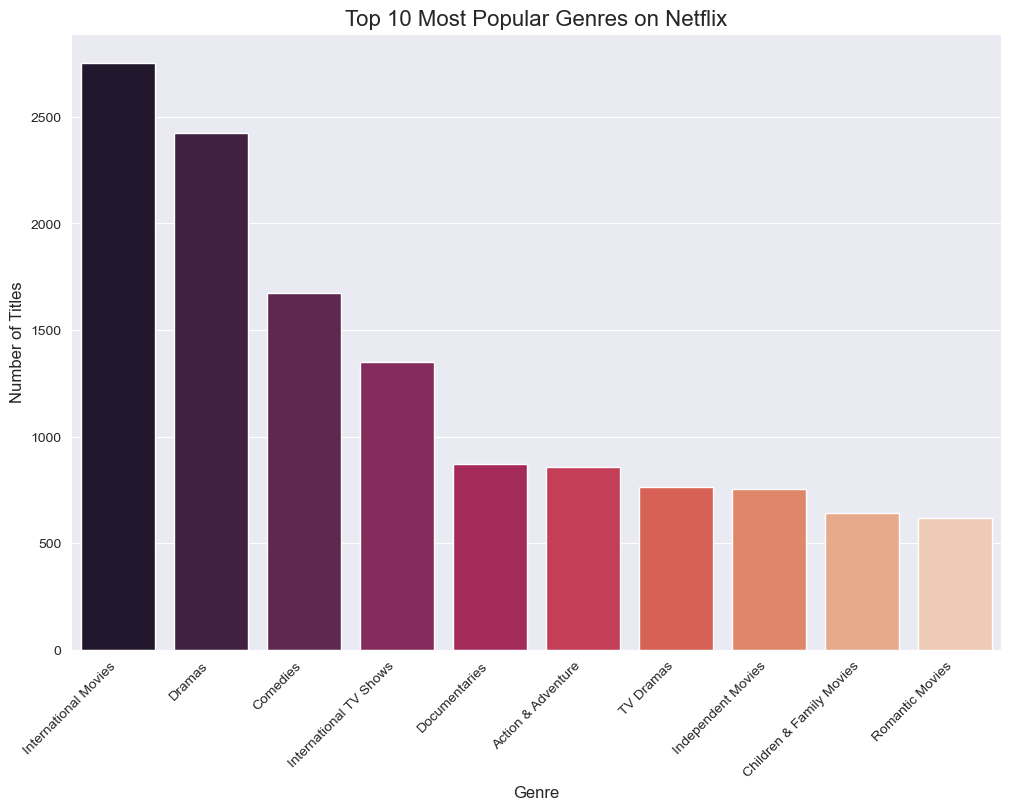

In [30]:
# Split the 'listed_in' string and create a new row for each genre
genres = df['listed_in'].str.split(', ')
genres = genres.explode()

# Get the top 10 genres
top_10_genres = genres.value_counts().head(10)

# Create the vertical bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='rocket', hue=top_10_genres.index, legend=False)

# Add titles and labels
plt.title('Top 10 Most Popular Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right') 

plt.show()

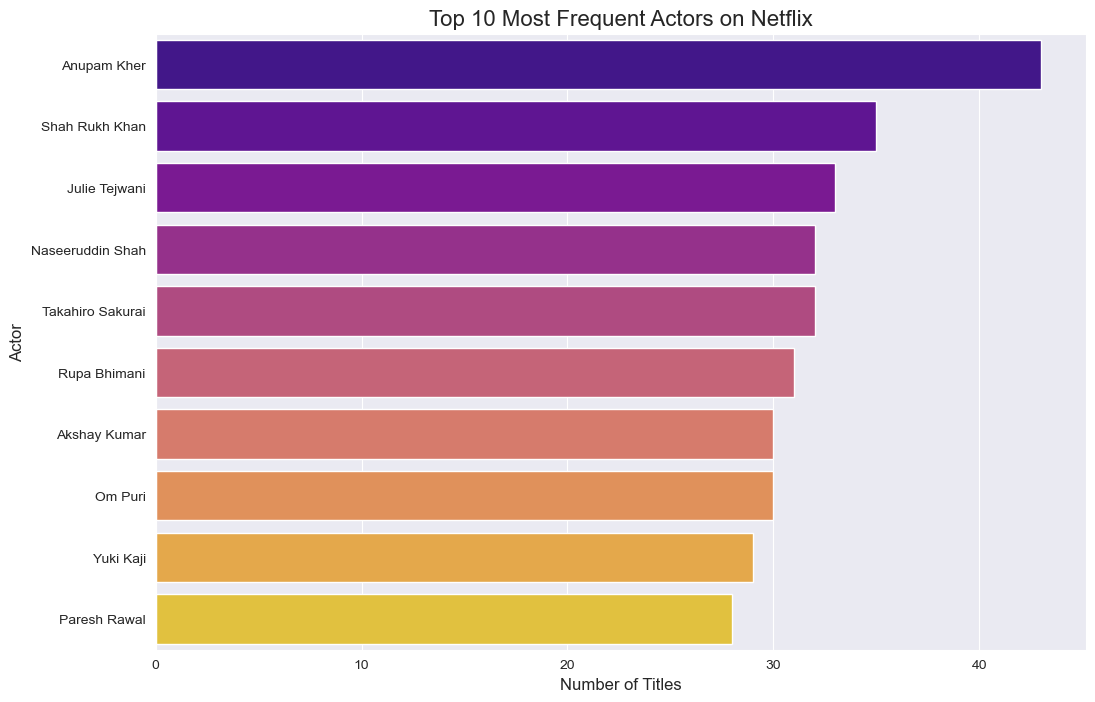

In [20]:
# We'll analyze only the non-unknown cast members
top_actors = df[df['cast'] != 'Unknown'].copy()

# Split the cast string and create a new row for each actor
top_actors['cast'] = top_actors['cast'].str.split(', ')
top_actors = top_actors.explode('cast')

# Get the top 10 actors
top_10_actors = top_actors['cast'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='plasma', hue=top_10_actors.index, legend=False)
plt.title('Top 10 Most Frequent Actors on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.show()

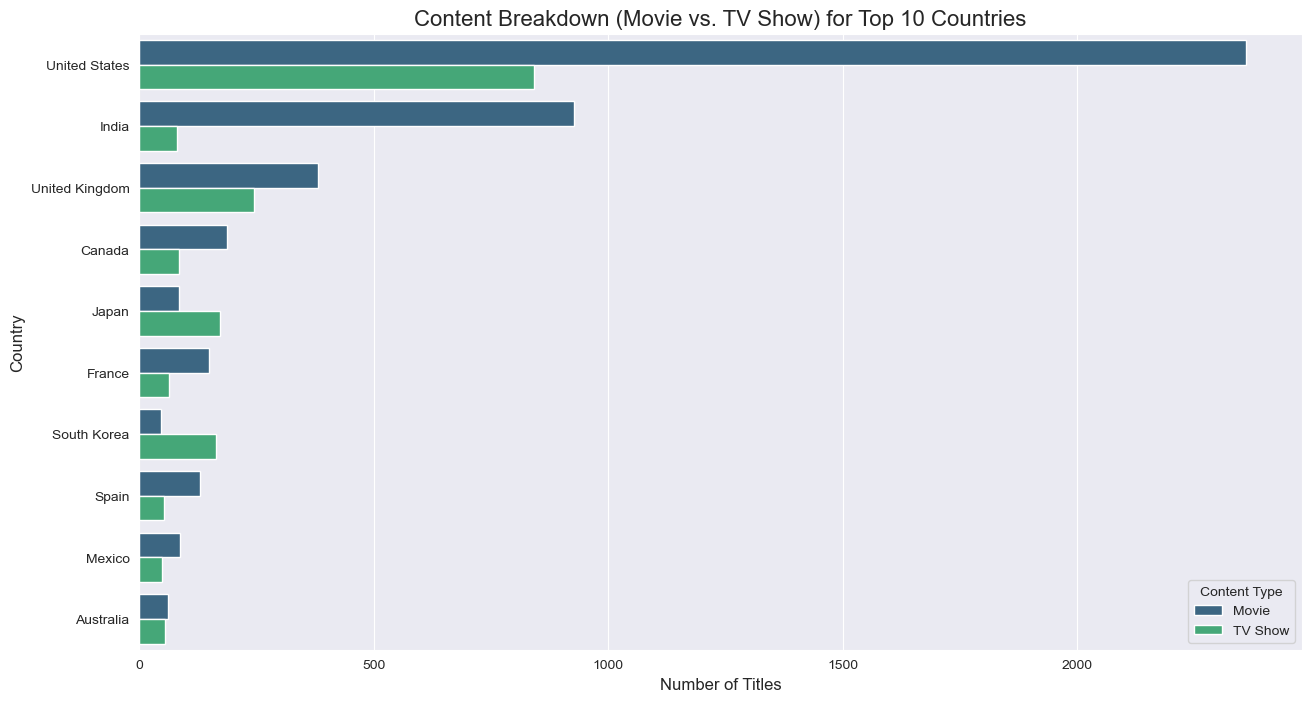

In [29]:
# --- Grouped Bar Chart for Top Countries by Content Type ---

# We'll analyze only the non-unknown countries and take the primary country
top_countries_df = df[df['country'] != 'Unknown'].copy()
top_countries_df['country'] = top_countries_df['country'].str.split(',').str[0]

# Get the top 10 countries
top_10_countries = top_countries_df['country'].value_counts().head(10).index

# Filter our dataframe to only these top countries
df_top_10 = top_countries_df[top_countries_df['country'].isin(top_10_countries)]

# Create the plot
plt.figure(figsize=(15, 8))
sns.countplot(y='country', hue='type', data=df_top_10, order=top_10_countries, palette='viridis')

plt.title('Content Breakdown (Movie vs. TV Show) for Top 10 Countries', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Content Type')
plt.show()